In [1]:
import pickle

In [2]:
X = pickle.load(open('X.pkl','rb'))
y = pickle.load(open('y.pkl','rb'))

In [3]:
type(X[0][0][0][0])

numpy.float64

In [4]:
X.shape

(1596, 100, 100, 3)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape=X.shape[1:], activation='relu'))

model.add(Dense(2, activation='softmax'))

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X,y,epochs=5,validation_split=0.1)

Epoch 1/5
45/45 [==============================] - 12s 251ms/step - loss: 0.6108 - accuracy: 0.7396 - val_loss: 0.1398 - val_accuracy: 0.9875
Epoch 2/5
45/45 [==============================] - 11s 249ms/step - loss: 0.0876 - accuracy: 0.9735 - val_loss: 0.0335 - val_accuracy: 0.9812
Epoch 3/5
45/45 [==============================] - 11s 250ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 4/5
45/45 [==============================] - 11s 252ms/step - loss: 9.8422e-04 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 5/5
45/45 [==============================] - 11s 252ms/step - loss: 4.1827e-04 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9875


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [11]:
model.predict(X[:4])

array([[2.7690112e-04, 9.9972314e-01],
       [9.9981946e-01, 1.8054871e-04],
       [9.9999225e-01, 7.7346504e-06],
       [9.9920976e-01, 7.9018931e-04]], dtype=float32)

In [12]:
y[:4]

array([1, 0, 0, 0])

In [13]:
import matplotlib.pyplot as plt

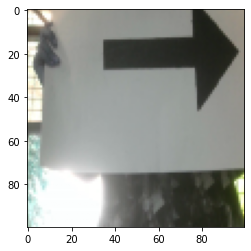

In [17]:
plt.imshow(X[:4][3])

In [29]:
import cv2
import numpy as np

In [19]:
img = cv2.imread('fire.jpeg')

In [20]:
img = cv2.resize(img,(100,100))

In [24]:
img  = img/255

In [30]:
img = np.array(img)

In [34]:
img_list = [img]
img_list = np.array(img_list)

In [35]:
model.predict(img_list)

array([[0.8056102 , 0.19438975]], dtype=float32)

In [36]:
model.save('arrow_detection.h5')